# In-depth Analysis of Waiter's Tips Dataset

## Introduction
In this notebook, a comprehensive analysis is performed on the waiter's tips dataset. The data is explored, preprocessed, and several machine learning models are trained to predict the tip amount. Various techniques are also employed such as stacking and ensembling to enhance the predictions.

## Importing necessary Libraries and Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = 'data/tips.csv'
tips_df = pd.read_csv(file_path)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exploratory Data Analysis (EDA)

### Distribution of Tips

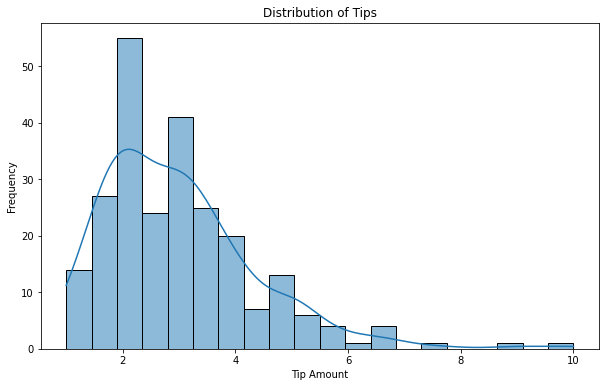

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(tips_df['tip'], kde=True, bins=20)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

### Total Bill vs. Tip

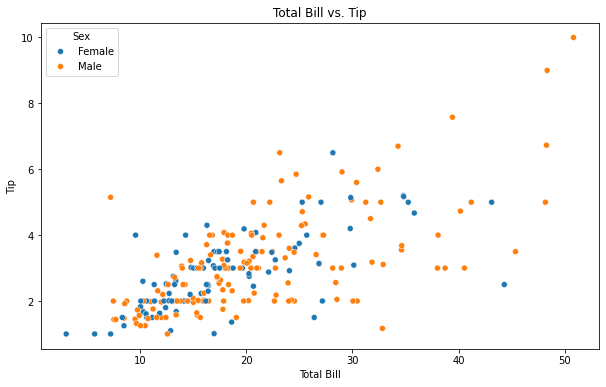

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips_df, x='total_bill', y='tip', hue='sex')
plt.title('Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Sex')
plt.show()

### Tips by Day of the Week

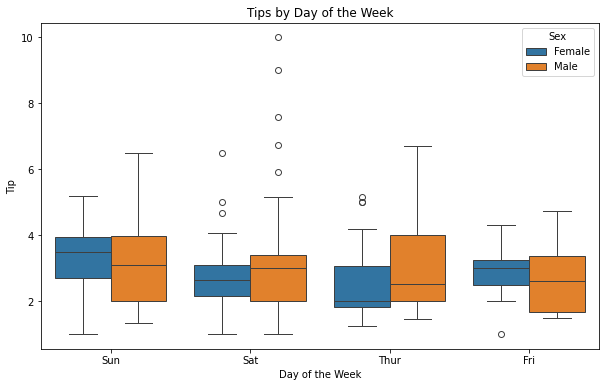

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tips_df, x='day', y='tip', hue='sex')
plt.title('Tips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip')
plt.legend(title='Sex')
plt.show()

## Data Preprocessing

In [5]:
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

numerical_features = ['total_bill', 'size']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'smoker', 'day', 'time']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [6]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}\n')

Linear Regression:
MAE: 0.67, MSE: 0.70, R2: 0.44

Random Forest:
MAE: 0.77, MSE: 0.94, R2: 0.25

Gradient Boosting:
MAE: 0.74, MSE: 0.84, R2: 0.33



## Stacking and Ensembling

In [7]:
base_models = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

stacking_model = StackingRegressor(estimators=base_models, final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42))

stacking_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', stacking_model)])
stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)

mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Model:\nMAE: {mae_stack:.2f}, MSE: {mse_stack:.2f}, R2: {r2_stack:.2f}')

Stacking Model:
MAE: 0.82, MSE: 1.22, R2: 0.03


## XGBoost, CatBoost and LightGBM

In [9]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'HistGradient Boosting': HistGradientBoostingRegressor(max_iter=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(n_estimators=100, random_state=42, verbose=0)
}

results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    print(f'{name}:\nMAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}\n')

AdaBoost:
MAE: 0.77, MSE: 0.87, R2: 0.31

Gradient Boosting:
MAE: 0.74, MSE: 0.84, R2: 0.33

HistGradient Boosting:
MAE: 0.71, MSE: 0.76, R2: 0.39

XGBoost:
MAE: 0.72, MSE: 0.93, R2: 0.26

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 11
[LightGBM] [Info] Start training from score 3.087795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

### Summary of All Models' Performance

In [10]:
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2
AdaBoost,0.771765,0.865430,0.307640
Gradient Boosting,0.739707,0.837843,0.329710
HistGradient Boosting,0.705633,0.757775,0.393766
XGBoost,0.716721,0.929765,0.256171
LightGBM,0.701271,0.772884,0.381679
CatBoost,0.714505,0.784516,0.372372


## Conclusion
In this notebook, an in-depth analysis is performed on the waiter's tips dataset. The data is explored, preprocessed, and several machine learning models are trained to predict the tip amount. Stacking and ensembling techniques are utilized, as well as advanced models such as AdaBoost, Gradient Boosting, HistGradient Boosting, XGBoost, LightGBM, and CatBoost to enhance our predictions. The results demonstrate the effectiveness of these advanced techniques in predicting the tip amount.